Tabela a ser analisada é referente a dados de marketing digital onde os canais digitais são utilizados por marcas para promover os seus produtos ou conteúdos institucionais.

Descrição das colunas da base:
COLUNA VEICULO = Canais de marketing digital.
COLUNA CATEGORIA = Indica o foco da campanha -  Institucional = Promoção da marca - Produto = Divugação do produto
COLUNA DATA = Data da ocorrencia
COLUNA INVESTIMENTO = Valor Investido em reais.
COLUNA LEADS = Quantidade de pessoas que interagiram ou demonstração interesses
COLUNA SESSOES = Quantidade de vezes que o web site foi acessado
COLUNA IMPRESSOES = Quantidade de vezes que o anuncio foi exibido
COLUNA CPL = Custo por LEADS.

1 - IMPORTAR BIBLIOTECA

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

2 - IMPORTAR DADOS E VERIFICAR SUA ESTRUTURA

In [48]:
tabela = pd.read_excel("DadosMarketingDigital.xlsx")

# Verificar a tabela de dados
display(tabela.head())

# Alterar o nome das colunas e a estrutura das duas primeiras linhas: 1 - LINHA COM TODOS OS CAMPOS VAZIOS / 2 - LINHA COM OS TITULOS DAS COLUNAS
tabela_etl = tabela.rename(columns={'Unnamed: 0' : 'Veiculo',
                                'Unnamed: 1': 'Categoria',
                                'Unnamed: 2': 'Data',
                                'Unnamed: 3': 'Investimento',
                                'Unnamed: 4': 'Leads',
                                'Unnamed: 5': 'Sessoes',
                                'Unnamed: 6': 'Impressoes',
                                'Unnamed: 7': 'CPL',
                                'Unnamed: 8': 'Formato'}).drop(index = 0).drop(index = 1)
tabela_etl = tabela_etl.reset_index(drop=True)

# Alterar o tipo de dados da coluna 'Data'
tabela_etl['Data'] = pd.to_datetime(tabela_etl['Data'])

# Criar uma coluna com o Mês e Ano
tabela_etl['Mes'] = tabela_etl['Data'].dt.month
tabela_etl['Ano'] = tabela_etl['Data'].dt.year

# Verificar os itens nulos
print(tabela_etl.info())

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Veiculo,Categoria,data,Investimento,Leads,Sessoes,Impressoes,CPL,formato
2,Google Search,Institucional,2020-01-01 00:00:00,926.96,30,5543,57000,30.89866666666667,NAN
3,Google Search,Institucional,2020-01-02 00:00:00,939.78,46,6632,44997,20.43,NAN
4,Google Search,Institucional,2020-01-03 00:00:00,926.29,0,0,49519,inf,NAN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Veiculo       2398 non-null   object        
 1   Categoria     2398 non-null   object        
 2   Data          2398 non-null   datetime64[ns]
 3   Investimento  2398 non-null   object        
 4   Leads         2398 non-null   object        
 5   Sessoes       2398 non-null   object        
 6   Impressoes    1625 non-null   object        
 7   CPL           2398 non-null   object        
 8   Formato       2398 non-null   object        
 9   Mes           2398 non-null   int32         
 10  Ano           2398 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(8)
memory usage: 187.5+ KB
None


Na Coluna 'Impressoes' temos um total de 773 campos nulos.

In [49]:
# Confirmação dos itens nulos/vazios
display(tabela_etl['Veiculo'].loc[(tabela_etl['Impressoes'].isnull())].value_counts())
# Localizar veiculos com itens nulos
print('Quantidade de itens nulos no campo Impressoes do Veículo Facebook:',tabela_etl['Impressoes'].loc[tabela_etl['Veiculo'] == 'Facebook'].isnull().sum())

Veiculo
Facebook    773
Name: count, dtype: int64

Quantidade de itens nulos no campo Impressoes do Veículo Facebook: 773


Foi identificado que todos os campos da coluna 'Impressoes' que se encontram nulos, são referentes ao canal de marketing digital Facebook.

In [50]:
# Tratatar os Itens nulos - Colocar todos como zero
tabela_etl['Impressoes'] = tabela_etl['Impressoes'].fillna(0)

In [51]:
display(tabela_etl.head())

,Veiculo,Categoria,Data,Investimento,Leads,Sessoes,Impressoes,CPL,Formato,Mes,Ano
0,Google Search,Institucional,2020-01-01,926.96,30,5543,57000,30.89866666666667,NAN,1,2020
1,Google Search,Institucional,2020-01-02,939.78,46,6632,44997,20.43,NAN,1,2020
2,Google Search,Institucional,2020-01-03,926.29,0,0,49519,inf,NAN,1,2020
3,Google Search,Institucional,2020-01-04,922.44,0,0,46892,inf,NAN,1,2020
4,Google Search,Institucional,2020-01-05,921.86,58,9739,47760,15.89413793103448,NAN,1,2020


In [52]:
display(tabela_etl.loc[tabela_etl['CPL'] == 'inf']['Veiculo'].value_counts())

Veiculo
Google Search    12
Facebook          7
Name: count, dtype: int64

Temos na coluna CPL - 12 campos do veículo Google Search e 7 do veículo Facebook onde, o CPL se encontra sem informação pois não houve Leads nesses dias.

In [102]:
#dia da semana 0 = segunda - 6 = domingo
tabela_etl['Dia_semana'] = tabela_etl['Data'].dt.dayofweek
tabela_etl['Dia_semana'] = tabela_etl['Dia_semana'].astype(str).replace(['0', '1', '2', '3', '4', '5', '6'], ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sabado', 'Domingo']) 
display(tabela_etl.head())
display(tabela_etl.loc[tabela_etl['CPL'] == 'inf']['Dia_semana'].value_counts())

,Veiculo,Categoria,Data,Investimento,Leads,Sessoes,Impressoes,CPL,Formato,Mes,Ano,Dia_semana
0,Google Search,Institucional,2020-01-01,926.96,30,5543,57000,30.89866666666667,NAN,1,2020,Quarta-feira
1,Google Search,Institucional,2020-01-02,939.78,46,6632,44997,20.43,NAN,1,2020,Quinta-feira
2,Google Search,Institucional,2020-01-03,926.29,0,0,49519,inf,NAN,1,2020,Sexta-feira
3,Google Search,Institucional,2020-01-04,922.44,0,0,46892,inf,NAN,1,2020,Sabado
4,Google Search,Institucional,2020-01-05,921.86,58,9739,47760,15.89413793103448,NAN,1,2020,Domingo


Dia_semana
Sabado           8
Domingo          4
Sexta-feira      3
Segunda-feira    2
Quarta-feira     1
Quinta-feira     1
Name: count, dtype: int64

Nos dias da semana Sábado e Domingo, o CPL ficou sem informação 12 vezes. não houve Leads em 

In [83]:
print('TABELA DE INVESTIMENTO DAS LEADS = ZERO-0')
leads_zero = tabela_etl.loc[tabela_etl['Leads'] == 0].groupby(['Veiculo', 'Ano', 'Dia_semana']).agg(
quant = ('Veiculo', 'count'),
investimento = ('Investimento', 'sum'))

leads_zero

TABELA DE INVESTIMENTO DAS LEADS = ZERO-0


quant investimento
Veiculo       Ano  Dia_semana                    
Facebook      2020 0               1         0.06
                   4               1      1006.42
                   5               2      2331.83
              2021 2               1       145.88
              2022 0               1       197.09
                   3               1         6.54
Google Search 2020 4               2      2168.08
                   5               5  5125.264194
                   6               1       321.48
              2021 5               1      2889.09
                   6               3      5436.24

In [81]:
display(tabela_etl.loc[tabela_etl['Leads'] == 0].sort_values(['Ano', 'Dia_semana']))

,Veiculo,Categoria,Data,Investimento,Leads,Sessoes,Impressoes,CPL,Formato,Mes,Ano,Dia_semana
1681,Facebook,Produto,2020-03-02,0.06,0,4,0,inf,DINAMICO,3,2020,0
2,Google Search,Institucional,2020-01-03,926.29,0,0,49519,inf,NAN,1,2020,4
817,Google Search,Produto,2020-01-03,1241.79,0,0,294677,inf,NAN,1,2020,4
1627,Facebook,Produto,2020-01-03,1006.42,0,0,0,inf,DINAMICO,1,2020,4
3,Google Search,Institucional,2020-01-04,922.44,0,0,46892,inf,NAN,1,2020,5
43,Google Search,Institucional,2020-02-15,847.34,0,9480,32423,inf,NAN,2,2020,5
48,Google Search,Institucional,2020-02-22,766.18,0,0,31955,inf,NAN,2,2020,5
818,Google Search,Produto,2020-01-04,1126.75,0,0,262841,inf,NAN,1,2020,5
862,Google Search,Produto,2020-02-22,1462.554194,0,0,288058,inf,NAN,2,2020,5
1628,Facebook,Produto,2020-01-04,1023.11,0,0,0,inf,DINAMICO,1,2020,5


3 - REALIZAR ANALISES

In [54]:
# Agrupar dadaos por veículo de comunicação e categoria
grupo_veiculo = tabela_etl.groupby(['Veiculo', 'Categoria']).agg(
quant = ('Data', 'count'))
grupo_veiculo['% Categoria'] = 100 * grupo_veiculo['quant'] / grupo_veiculo.groupby('Veiculo')['quant'].transform('sum')
grupo_veiculo['% Total'] = 100 * grupo_veiculo['quant'] / grupo_veiculo['quant'].sum()

display(grupo_veiculo)

quant  % Categoria    % Total
Veiculo       Categoria                                   
Facebook      Produto          773   100.000000  32.235196
Google Search Institucional    815    50.153846  33.986656
              Produto          810    49.846154  33.778148

O Facebook não é utilizado para divulgação da marca (Categoria = Institucional), o mesmo é utilizado somente para divulgação do produto (Categoria = Produto).

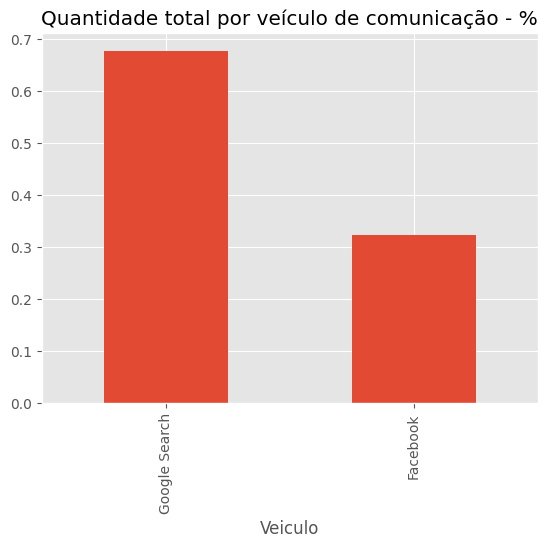

In [55]:
display(_ = tabela_etl['Veiculo'].value_counts(1).plot.bar())
_ = plt.title('Quantidade total por veículo de comunicação - %')

Considerando as duas categorias disponiveis, o veículo de comunicação mais utilizado é o Google Search.

In [56]:
# Gráfico de Investimento por Canal
investimento = tabela_etl.groupby(['Veiculo']).agg(
Valor_em_Reais = ('Investimento', 'sum'))
investimento_cat = tabela_etl.groupby(['Veiculo', 'Categoria']).agg(
Valor_em_Reais = ('Investimento', 'sum'))

investimento_cat['% Categoria'] = 100 * investimento_cat['Valor_em_Reais'] / investimento_cat.groupby('Veiculo')['Valor_em_Reais'].transform('sum')
investimento['% Total'] = 100 * investimento['Valor_em_Reais'] / investimento['Valor_em_Reais'].sum()

display(investimento)
display(investimento_cat)
investimento_cat = investimento_cat.reset_index()

,Valor_em_Reais,% Total
Veiculo,,
Facebook,997884.18,45.367462
Google Search,1201675.020134,54.632538


Valor_em_Reais % Categoria
Veiculo       Categoria                               
Facebook      Produto            997884.18       100.0
Google Search Institucional      375956.59   31.286045
              Produto        825718.430134   68.713955

O veículo de comunicação Google Search recebeu 54.63% de todo o investimento realizado até o momento.

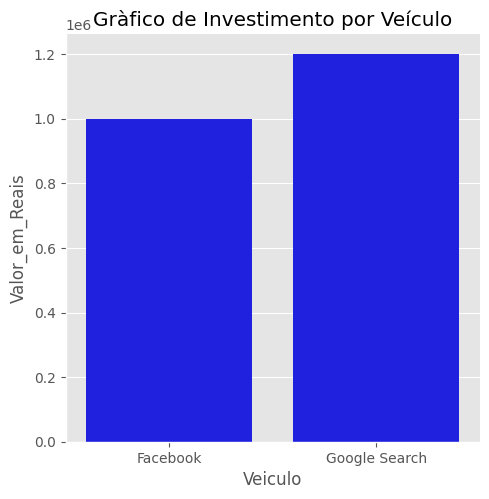

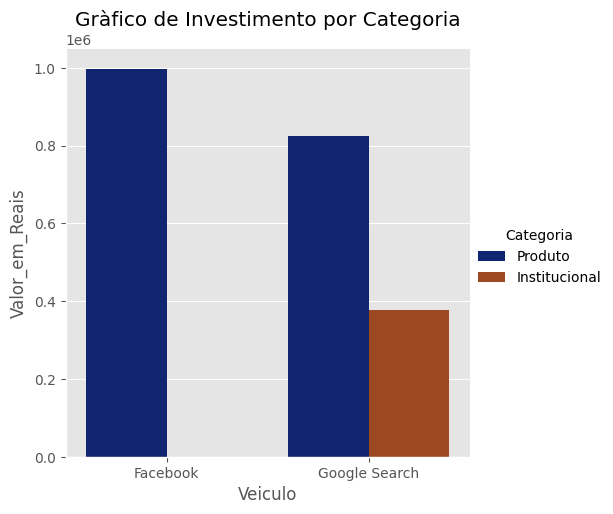

In [57]:
grafico_investimento = sns.catplot(data=investimento, kind="bar", x='Veiculo', y='Valor_em_Reais', color='blue')
grafico_investimento.set(title= "Gràfico de Investimento por Veículo")

grafico_investimento_cat = sns.catplot(data=investimento_cat, kind="bar", x='Veiculo', y='Valor_em_Reais', hue='Categoria', errorbar="sd", palette="dark")
grafico_investimento_cat.set(title= "Gràfico de Investimento por Categoria")
grafico_investimento_cat.legend.set_title("Categoria")

In [58]:
# Reestrutura dados para melhor visualização dos dados
tabela_etl_rest = pd.melt(tabela_etl, id_vars = ['Veiculo', 'Categoria', 'Ano'], value_vars = ['Leads', 'Sessoes' , 'Impressoes'])
display(tabela_etl_rest)

,Veiculo,Categoria,Ano,variable,value
0,Google Search,Institucional,2020,Leads,30
1,Google Search,Institucional,2020,Leads,46
2,Google Search,Institucional,2020,Leads,0
3,Google Search,Institucional,2020,Leads,0
4,Google Search,Institucional,2020,Leads,58
...,...,...,...,...,...
7189,Facebook,Produto,2021,Impressoes,0
7190,Facebook,Produto,2021,Impressoes,0
7191,Facebook,Produto,2021,Impressoes,0
7192,Facebook,Produto,2021,Impressoes,0


In [59]:
#AGRUPAR VEICULO X CATEGORIA X ANO
tabela_etl_rest.groupby(['Veiculo', 'Ano', 'Categoria', 'variable']).agg(
quant = ('value', 'sum'))

quant
Veiculo       Ano  Categoria     variable            
Facebook      2020 Produto       Impressoes         0
                                 Leads          53759
                                 Sessoes      1149613
              2021 Produto       Impressoes         0
                                 Leads          44266
                                 Sessoes       479099
              2022 Produto       Impressoes         0
                                 Leads           3357
                                 Sessoes        76612
Google Search 2020 Institucional Impressoes  10435958
                                 Leads          19042
                                 Sessoes      2814916
                   Produto       Impressoes  98117932
                                 Leads          18863
                                 Sessoes      2557965
              2021 Institucional Impressoes   9666362
                                 Leads          13035
                                 Sessoes      2718754
                   Produto       Impressoes  22933275
                                 Leads          19645
                                 Sessoes      2211439
              2022 Institucional Impressoes   2006945
                                 Leads           2611
                                 Sessoes       641285
                   Produto       Impressoes   3236687
                                 Leads           4158
                                 Sessoes       526461

Não podemos fazer uma comparação de qual plataforma esta sendo mais eficiente na promoção da marca pois o veículo de comunicação Facebook é utilizado somente para a promoção do produto.

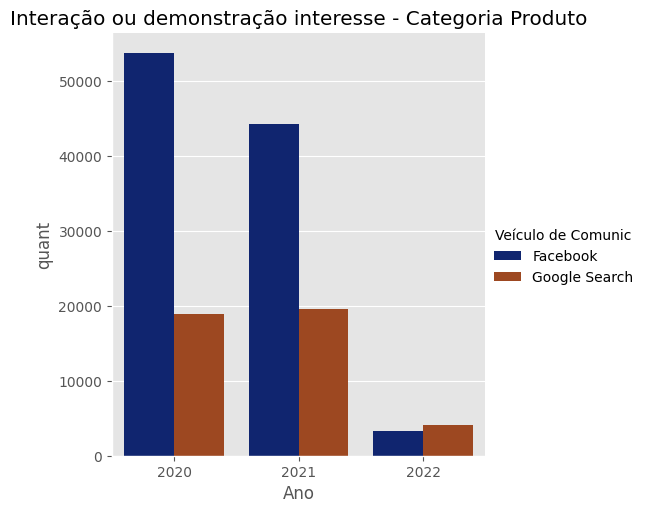

In [60]:
# Agrupamento por Leads - Quantidade de pessoas que interagiram ou demonstração interesses
grafico_leads = sns.catplot(data=tabela_etl_rest.loc[(tabela_etl_rest['variable'] == 'Leads') & (tabela_etl_rest['Categoria'] == 'Produto')]
                            .groupby(['Veiculo', 'Ano', 'variable'])
                            .agg(quant = ('value', 'sum')), kind="bar", x='Ano', y='quant', hue='Veiculo', errorbar="sd", palette="dark")
grafico_leads.set(title= "Interação ou demonstração interesse - Categoria Produto")
grafico_leads.legend.set_title("Veículo de Comunic")

Tendo como base somente a divulgação dos produtos, o grafico mostra que os acessos realizado pela plataforma Facebook estão reduzindo enquanto que entre os anos de 2020 e 2021, os acesso realizado pela plataforma Google Search teve um pequeno aumento.

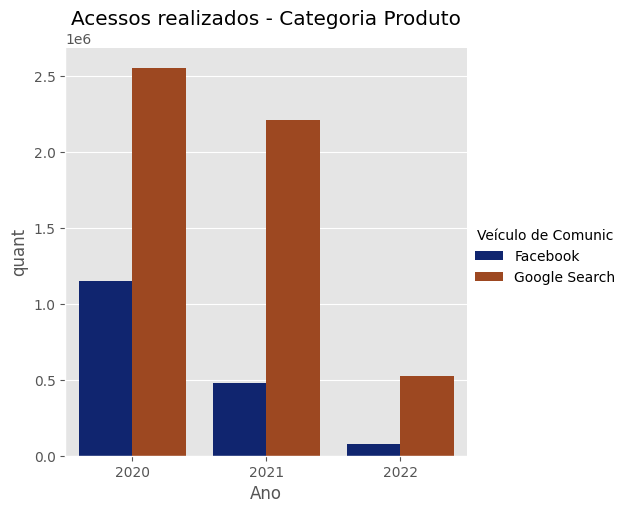

In [61]:
# Agrupamento por Sessoes - Quantidade de vezes que o web site foi acessado
grafico_sessoes = sns.catplot(data=tabela_etl_rest.loc[(tabela_etl_rest['variable'] == 'Sessoes')& (tabela_etl_rest['Categoria'] == 'Produto')]
                              .groupby(['Veiculo', 'Ano', 'variable'])
                              .agg(quant = ('value', 'sum')), kind="bar", x='Ano', y='quant', hue='Veiculo', errorbar="sd", palette="dark")
grafico_sessoes.set(title= "Acessos realizados - Categoria Produto")
grafico_sessoes.legend.set_title("Veículo de Comunic")

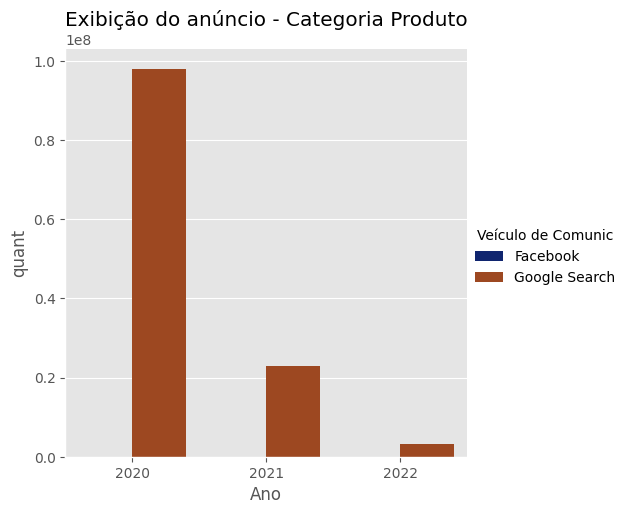

In [62]:
# Agrupamento por Impressoes - Quantidade de vezes que o anuncio foi exibido
grafico_impressoes = sns.catplot(data=tabela_etl_rest.loc[(tabela_etl_rest['variable'] == 'Impressoes')& (tabela_etl_rest['Categoria'] == 'Produto')]
                              .groupby(['Veiculo', 'Ano', 'variable'])
                              .agg(quant = ('value', 'sum')), kind="bar", x='Ano', y='quant', hue='Veiculo', errorbar="sd", palette="dark")
grafico_impressoes.set(title= "Exibição do anúncio - Categoria Produto")
grafico_impressoes.legend.set_title("Veículo de Comunic")

O veículo de comunicação Fecebook, não teve Impressões contabilizadas.

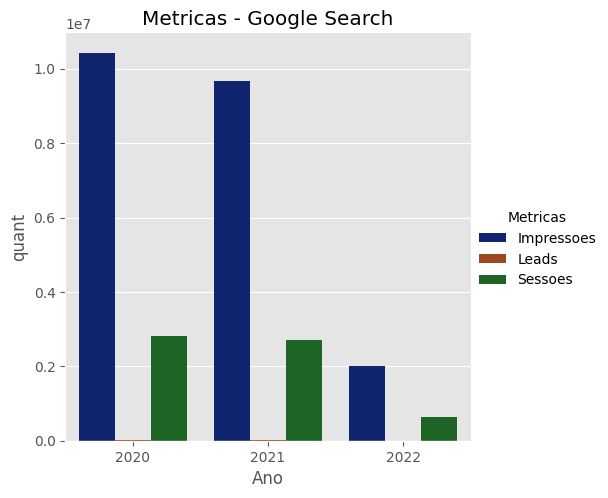

In [63]:
# Metricas para avaliação do Google Search
metrica_google = sns.catplot(data=tabela_etl_rest.loc[(tabela_etl_rest['Veiculo'] == 'Google Search') & (tabela_etl_rest['Categoria'] == 'Institucional')]
                            .groupby(['Veiculo', 'Ano', 'variable'])
                            .agg(quant = ('value', 'sum')), kind="bar", x='Ano', y='quant', hue='variable', errorbar="sd", palette="dark")
metrica_google.set(title= "Metricas - Google Search")
metrica_google.legend.set_title("Metricas")

In [64]:
display(tabela_etl.loc[tabela_etl['CPL'] == 'inf'])

,Veiculo,Categoria,Data,Investimento,Leads,Sessoes,Impressoes,CPL,Formato,Mes,Ano,Dia_semana
2,Google Search,Institucional,2020-01-03,926.29,0,0,49519,inf,NAN,1,2020,4
3,Google Search,Institucional,2020-01-04,922.44,0,0,46892,inf,NAN,1,2020,5
43,Google Search,Institucional,2020-02-15,847.34,0,9480,32423,inf,NAN,2,2020,5
48,Google Search,Institucional,2020-02-22,766.18,0,0,31955,inf,NAN,2,2020,5
303,Google Search,Institucional,2020-11-08,321.48,0,4586,12315,inf,NAN,11,2020,6
586,Google Search,Institucional,2021-08-22,858.21,0,10603,29125,inf,NAN,8,2021,6
817,Google Search,Produto,2020-01-03,1241.79,0,0,294677,inf,NAN,1,2020,4
818,Google Search,Produto,2020-01-04,1126.75,0,0,262841,inf,NAN,1,2020,5
862,Google Search,Produto,2020-02-22,1462.554194,0,0,288058,inf,NAN,2,2020,5
1394,Google Search,Produto,2021-08-21,2889.09,0,9494,70356,inf,NAN,8,2021,5
